# Lecture 27 Multilinear and Polynomial Regression
__MATH 3480__ - Dr. Michael Olson

Reading:
* Geron: Chapter 4

-----
## Multilinear Regression
Linear regression works when you have one variable and one outcome. But what about multiple variables and multiple outcomes?
$$y=b_0+b_1x_1+b_2x_2+\dots+b_nx_n$$

The problem here is that the calculation is very, very complicated. And the more variables you have, the more complicated it gets.

So, we move from the basic equations to a linear algebra method. If the data is in matrix __A__, and the results are in __b__, then we solve the linear equation for __x__:
$$Ax=b$$

Either way, whether we deal with linear or multi-linear regression, the solution doesn't come out cleanly with large samples. To solve this, we use a __pseudo-inverse__ like we learned in MATH 3280.
$$Ax=b \qquad\to\qquad U\Sigma V^Tx=b \qquad\to\qquad x=V\Sigma^{-1}U^Tb \qquad\to\qquad x=A^\dagger b$$

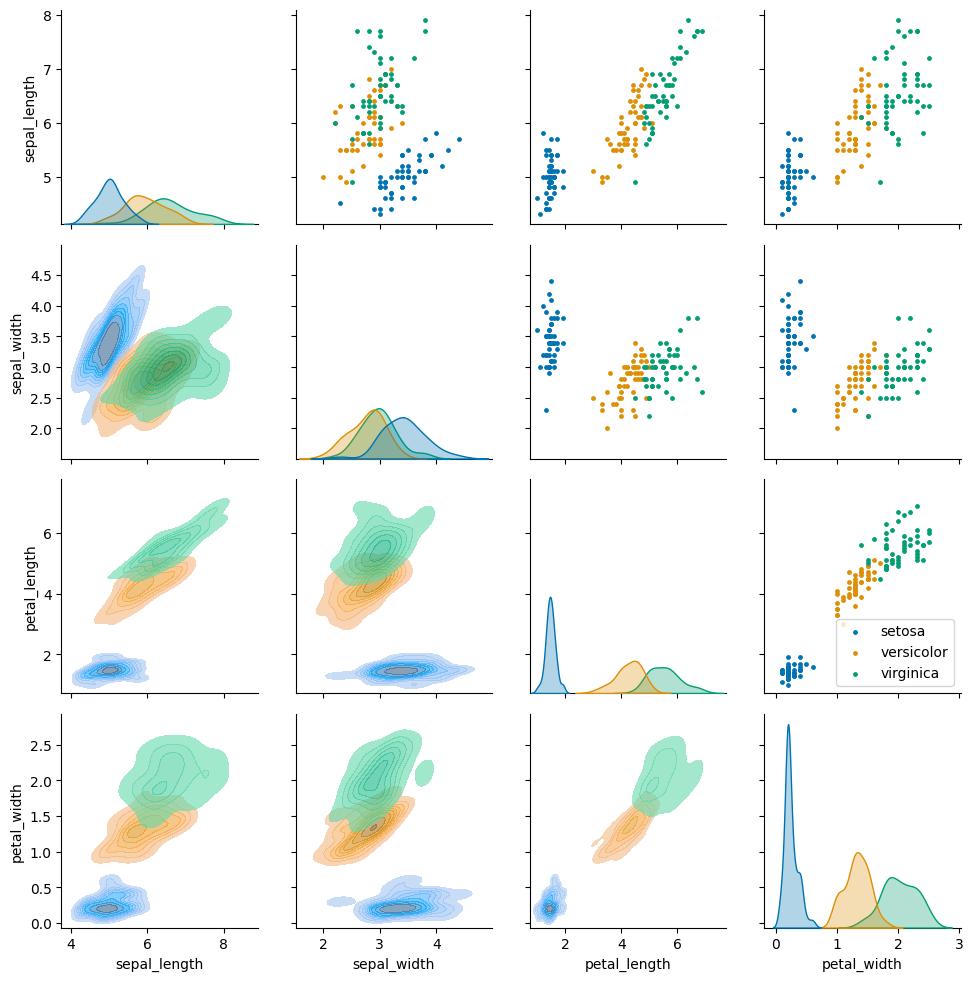

In [22]:
# Take the iris dataset
# Predict the Petal Width based on the other three variables

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
#sns.PairGrid(data=iris, x='petal_length', y='petal_width')

g = sns.PairGrid(iris, hue='species', palette='colorblind')
g.map_diag(sns.kdeplot, alpha=0.3, fill=True)
g.map_upper(plt.scatter, s=6)
g.map_lower(sns.kdeplot, alpha=0.6, fill=True)

plt.legend()

In [23]:
X = iris.drop(['petal_width','species'], axis=1).values
y = iris['petal_width'].values

In [24]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


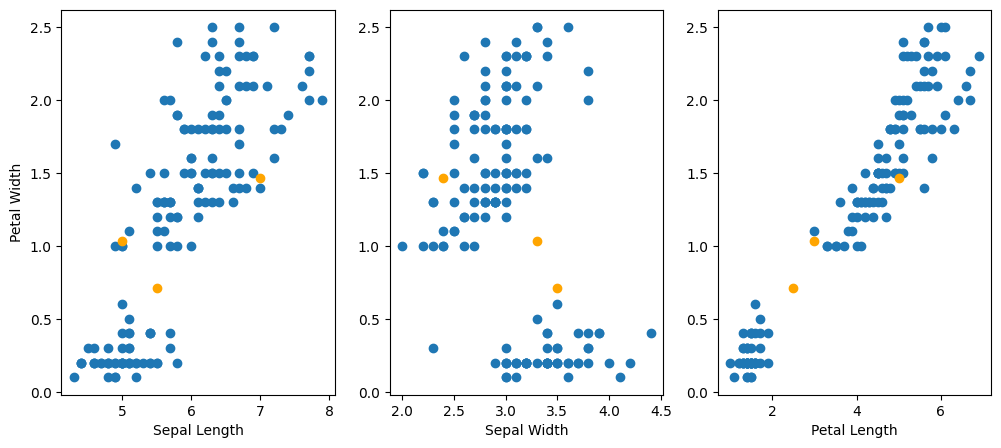

In [25]:
from sklearn.linear_model import LinearRegression
multi_reg = LinearRegression()
multi_reg.fit(X,y)

X_test = np.array([[5.0, 3.3, 3.0],
                   [5.5, 3.5, 2.5],
                   [7.0, 2.4, 5.0]])
y_predict = multi_reg.predict(X_test)


fig, ax = plt.subplots(1,3, figsize=(12,5))

ax[0].scatter(X[:,0],y)
ax[0].scatter(X_test[:,0],y_predict, c='orange')
ax[0].set_xlabel('Sepal Length')
ax[0].set_ylabel('Petal Width')

ax[1].scatter(X[:,1],y)
ax[1].scatter(X_test[:,1],y_predict, c='orange')
ax[1].set_xlabel('Sepal Width')

ax[2].scatter(X[:,2],y)
ax[2].scatter(X_test[:,2],y_predict, c='orange')
ax[2].set_xlabel('Petal Length')

plt.show()

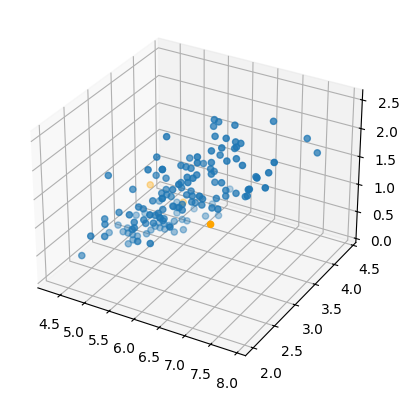

In [29]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X[:,0], X[:,1], y)
ax.scatter(X_test[:,0], X_test[:,1], y_predict, c='orange')
plt.show()

In [37]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=y, opacity=0.6, mode='markers'))
fig.add_trace(go.Scatter3d(x=X_test[:,0], y=X_test[:,1], z=y_predict, mode='markers'))
fig.show()

## Polynomial Regression
Sometimes, the data doesn't follow a linear pattern. In addition to linear regressions, we can also form polynomial regressions and sinusoidal regressions, and others. We will only look at a polynomial regression.

A polynomial regression equation would have the following form:
$$y=b_0+b_1x+b_2x^2+b_3x^3+\dots$$

This is solved similarly to the other regression forms. We'll just look at the model.

In [15]:
X = 6 * np.random.rand(100,1) - 3
y = 15 + 7*X - 0.35*X**2 - 0.6*X**3 + np.random.randn(100,1)

display(y)

array([[ 6.03655829],
       [ 3.78390838],
       [20.39994968],
       [ 7.92128544],
       [ 5.20326004],
       [ 4.69452045],
       [ 7.54469082],
       [ 7.502601  ],
       [ 5.1723701 ],
       [ 6.54252714],
       [ 8.88598675],
       [11.58594197],
       [ 3.87740224],
       [ 4.23497608],
       [15.7590904 ],
       [11.23306445],
       [12.51632545],
       [15.86849267],
       [22.4837224 ],
       [ 7.46547029],
       [ 4.03947   ],
       [ 4.59565798],
       [21.20788065],
       [21.19474498],
       [11.87371903],
       [ 9.60117946],
       [ 6.10520536],
       [ 3.70839684],
       [22.39560387],
       [14.51756977],
       [22.54426026],
       [ 3.63668054],
       [ 7.99803554],
       [22.21784411],
       [ 7.50166001],
       [ 6.98668852],
       [18.19034187],
       [22.61688261],
       [ 9.42523924],
       [22.55648021],
       [10.15748944],
       [21.23738567],
       [ 5.29336309],
       [12.11180413],
       [23.12021726],
       [ 6

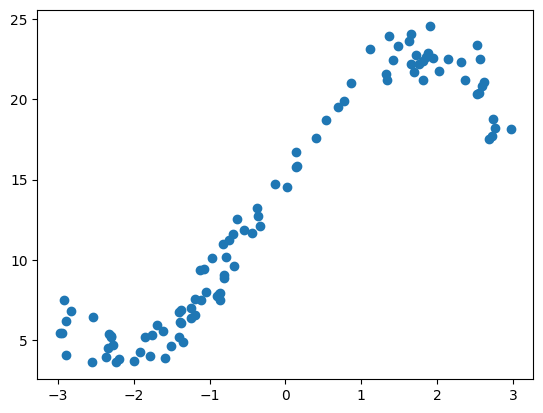

In [16]:
plt.scatter(X,y)

array([[-1.37272781e+00,  1.88438164e+00, -2.58674309e+00],
       [-2.19639131e+00,  4.82413478e+00, -1.05956877e+01],
       [ 2.54894221e+00,  6.49710639e+00,  1.65607487e+01],
       [-8.65875955e-01,  7.49741170e-01, -6.49182851e-01],
       [-1.40084349e+00,  1.96236248e+00, -2.74896271e+00],
       [-2.27551260e+00,  5.17795760e+00, -1.17825078e+01],
       [-1.19681587e+00,  1.43236824e+00, -1.71428105e+00],
       [-2.91853350e+00,  8.51783781e+00, -2.48595950e+01],
       [-1.85132080e+00,  3.42738871e+00, -6.34519600e+00],
       [-1.18983121e+00,  1.41569830e+00, -1.68444202e+00],
       [-8.13558317e-01,  6.61877135e-01, -5.38475647e-01],
       [-6.85213367e-01,  4.69517359e-01, -3.21719570e-01],
       [-1.58168648e+00,  2.50173213e+00, -3.95695589e+00],
       [-1.91935756e+00,  3.68393344e+00, -7.07078548e+00],
       [ 1.34708781e-01,  1.81464556e-02,  2.44448690e-03],
       [-7.48243649e-01,  5.59868558e-01, -4.18918093e-01],
       [-6.39039805e-01,  4.08371872e-01

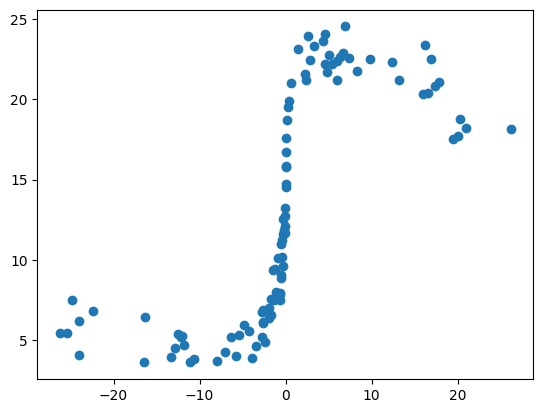

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


###  Extract polynomial features  ###
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

display(X_poly)
plt.scatter(X_poly[:,2],y)

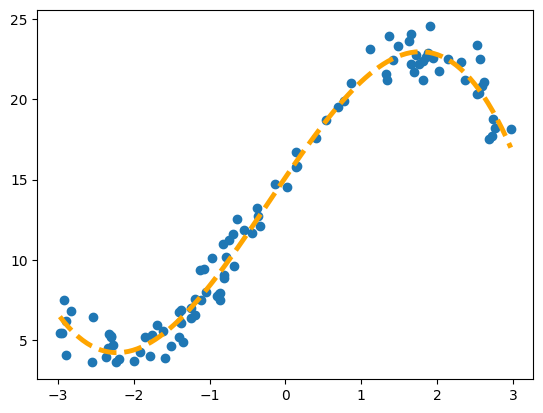

In [21]:


###  Create the model  ###
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)


# Plot the results
x_test = np.linspace(X.min(),X.max(),100)
test_poly = poly_features.fit_transform(x_test.reshape(-1,1))
y_predict = poly_reg.predict(test_poly)

fig,ax = plt.subplots()
ax.scatter(X,y)
ax.plot(x_test,y_predict, linestyle='--', linewidth=3.5, c='orange')
plt.show()

-----
Homework
* Create a function in Python that will calculate the covariance
* Find the covariance of two smaller datasets
* Create a function in Python that will calculate the correlation
* Find the correlation of the same two smaller datasets
* Create a linear regression for the following data
  * Test the model with testing data and do an evaluation of the model
  * You may have to experiment to find the right polynomial degree